    Depth        WOB  SURF_RPM   ROP_AVG      PHIF       VSH   SW  KLOGH
0  3305.0  26217.864  1.314720  0.004088  0.086711  0.071719  1.0  0.001
1  3310.0  83492.293  1.328674  0.005159  0.095208  0.116548  1.0  0.001
2  3315.0  97087.882  1.420116  0.005971  0.061636  0.104283  1.0  0.001
3  3320.0  54793.206  1.593931  0.005419  0.043498  0.110040  1.0  0.001
4  3325.0  50301.579  1.653262  0.005435  0.035252  0.120808  1.0  0.001


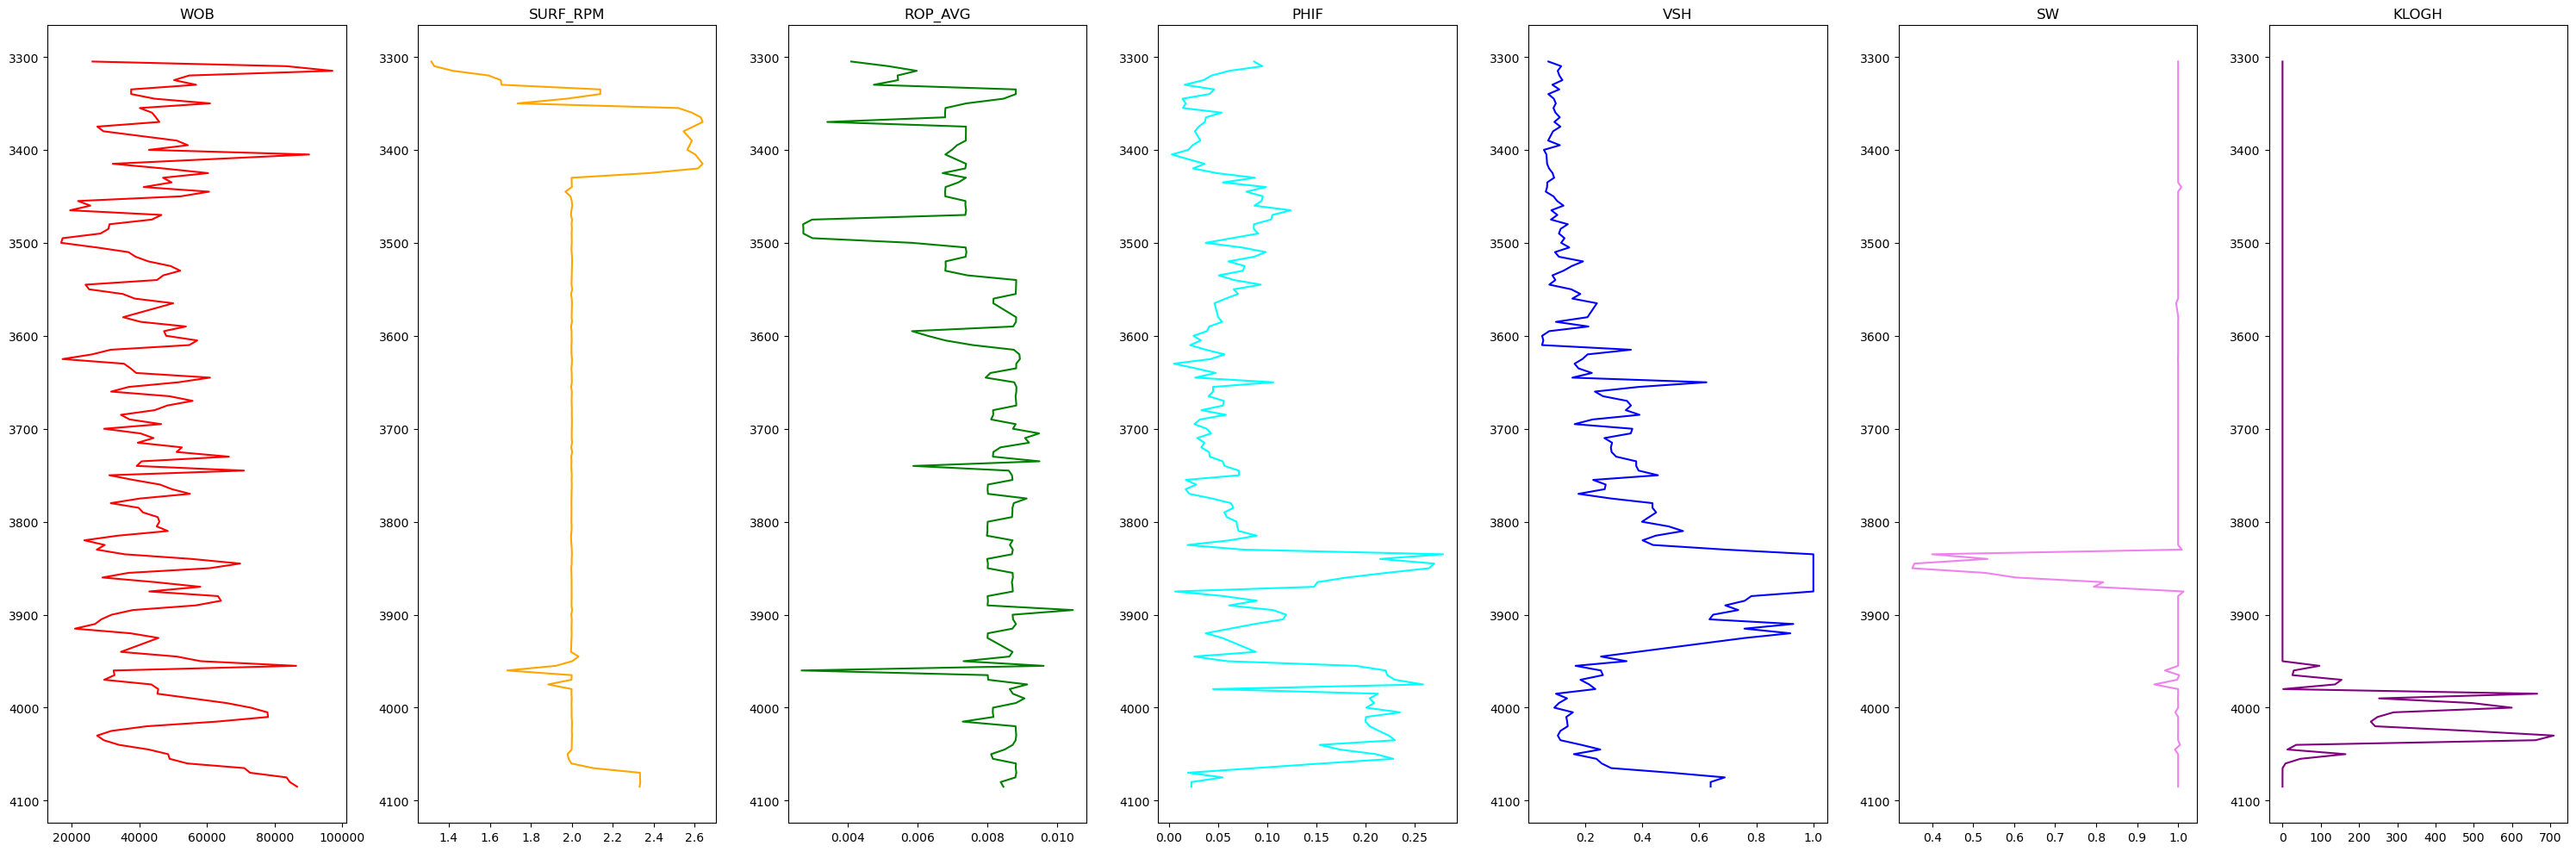

In [10]:

import pandas as pd
import matplotlib.pyplot as plt

# URL for the raw CSV file
url = "https://raw.githubusercontent.com/amolsriv/Oil-and-Gas-Projects/main/ROP%20data%20.csv"

# dataset
data = pd.read_csv(url)

# first few rows
print(data.head())

# logs and colors
logs = data.columns[1:]  # Exclude the first column
colors = ['red', 'orange', 'green', 'cyan', 'blue', 'violet', 'purple']

# plot
plt.figure(figsize=(30, 10))  # Set figure size

for i in range(len(logs)):
    plt.subplot(1, len(logs), i + 1)  # Adjust subplot for the number of logs
    plt.plot(data[logs[i]], data.Depth, color=colors[i % len(colors)])  # Plot with cycling colors
    plt.title(logs[i])  # Add title for each log
    plt.gca().invert_yaxis()  # Invert y-axis for depth

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Descriptive Statistics:
             Depth           WOB    SURF_RPM     ROP_AVG        PHIF  \
count   151.000000    151.000000  151.000000  151.000000  151.000000   
mean   3697.417219  45393.934391    2.034981    0.007800    0.084423   
std     227.169433  15784.246882    0.208492    0.001476    0.068230   
min    3305.000000  16961.916000    1.314720    0.002666    0.002968   
25%    3502.500000  34320.946500    1.998711    0.007368    0.037550   
50%    3700.000000  44243.480000    1.999697    0.008157    0.059274   
75%    3887.500000  53212.685000    2.001069    0.008760    0.097212   
max    4085.000000  97087.882000    2.639233    0.010447    0.279346   

              VSH          SW       KLOGH  
count  151.000000  151.000000  151.000000  
mean     0.299809    0.975579   37.072228  
std      0.264596    0.108946  127.186210  
min      0.049451    0.351393   -0.001124  
25%      0.108539    1.000000    0.001000  
50%      0.193100    1.000000    0.001000  
75%      0.387664  

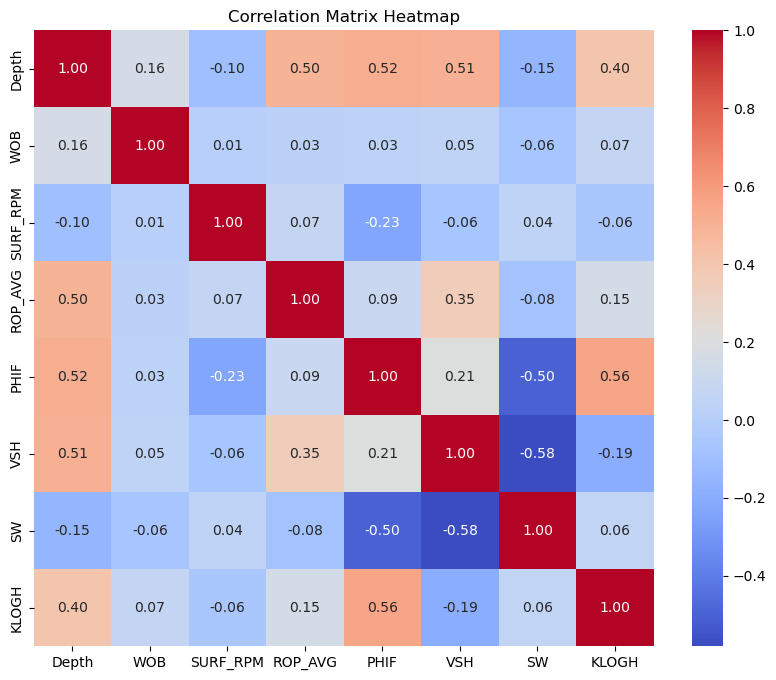

In [18]:
# Import seaborn for visualization
import seaborn as sns

# Display descriptive statistics
print("Descriptive Statistics:")
print(data.describe())

# Display correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix = data.corr()
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
plt.title("Correlation Matrix Heatmap")
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

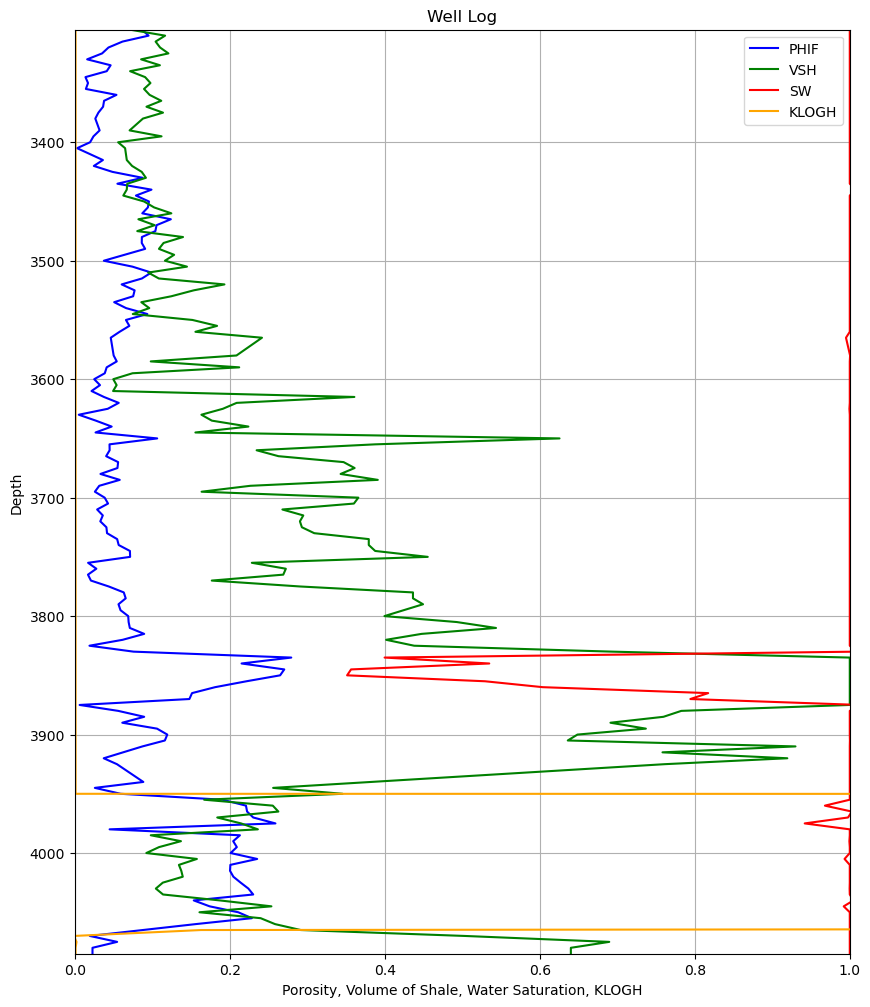

In [26]:

data = pd.read_csv(url)

# Ensuring the dataset has the required columns
columns = ['Depth', 'WOB', 'SURF_RPM', 'ROP_AVG', 'PHIF', 'VSH', 'SW', 'KLOGH']
missing_columns = [col for col in columns if col not in data.columns]
if missing_columns:
    raise ValueError(f"Missing columns in the dataset: {missing_columns}")

# Filtering the dataframe to include only the required columns
data = data[columns]

# Plotting the well log
fig, ax = plt.subplots(figsize=(10, 12))

# parameter against Depth
ax.plot(data['PHIF'], data['Depth'], label='PHIF', color='blue')
ax.plot(data['VSH'], data['Depth'], label='VSH', color='green')
ax.plot(data['SW'], data['Depth'], label='SW', color='red')
ax.plot(data['KLOGH'], data['Depth'], label='KLOGH', color='orange')

# axes
ax.set_xlim(0, 1)  # Adjust based on expected range for PHIF, VSH, SW, and KLOGH
ax.set_ylim(data['Depth'].max(), data['Depth'].min())  # Reverse y-axis for depth

# labels, title, and legend
ax.set_xlabel('Porosity, Volume of Shale, Water Saturation, KLOGH')
ax.set_ylabel('Depth')
ax.set_title('Well Log')
ax.legend()

# grid
plt.grid(True)

# plot
plt.show()

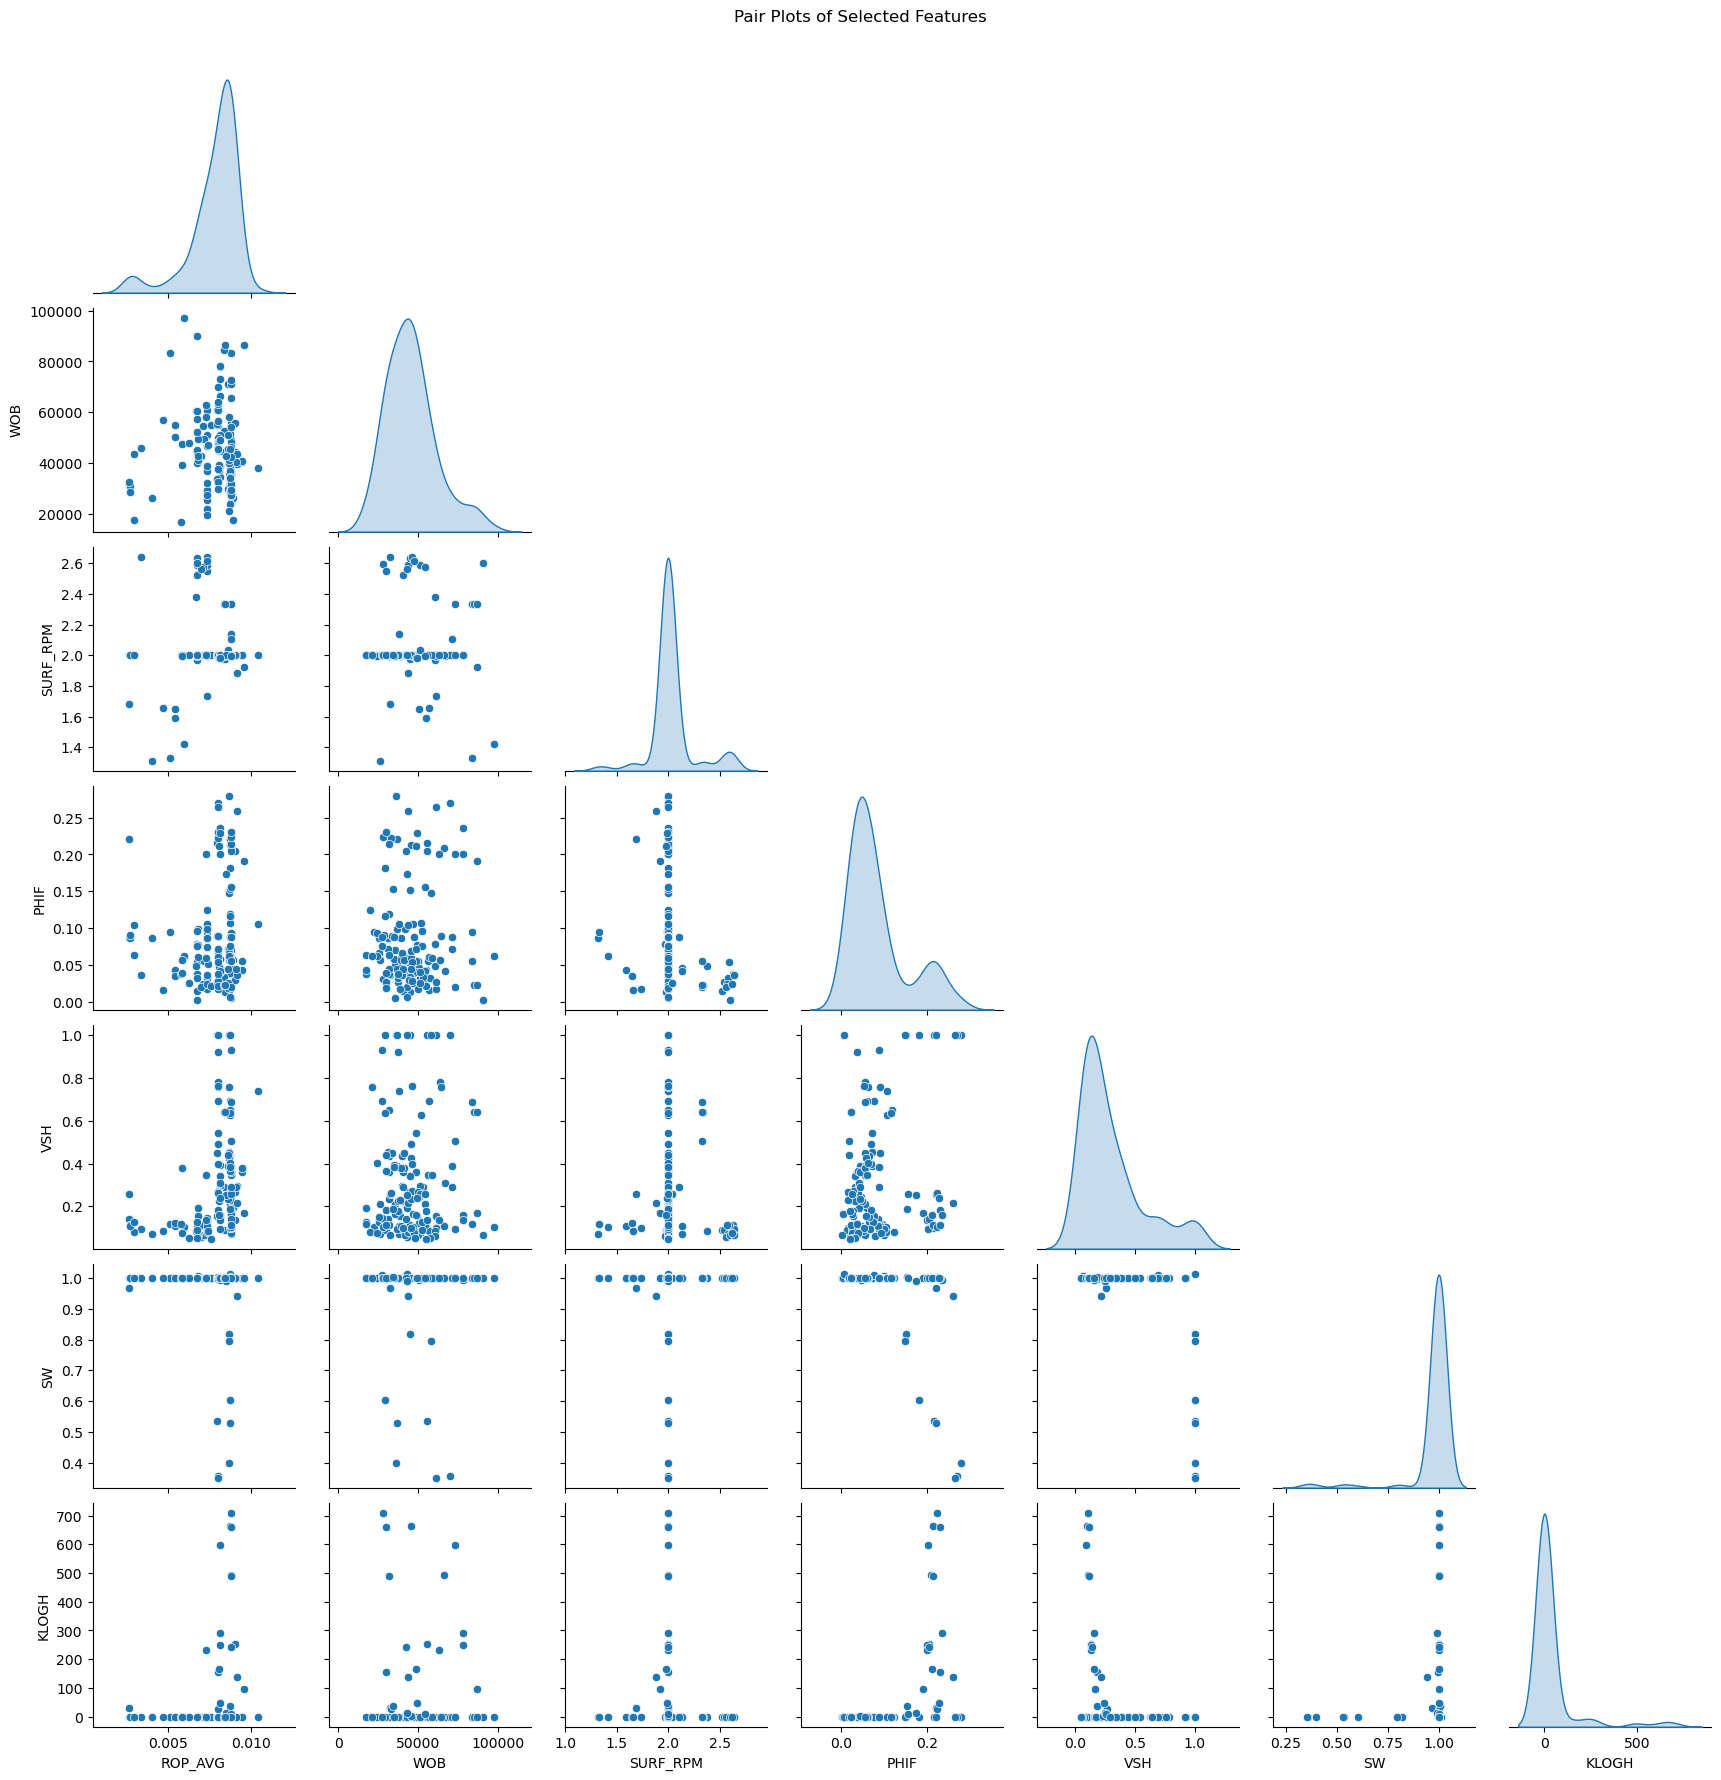

In [30]:
columns_for_pairplot = ['ROP_AVG', 'WOB', 'SURF_RPM', 'PHIF', 'VSH', 'SW', 'KLOGH']

# pair plot
sns.pairplot(data[columns_for_pairplot], diag_kind='kde', corner=True)
plt.suptitle("Pair Plots of Selected Features", y=1.02)
plt.show()

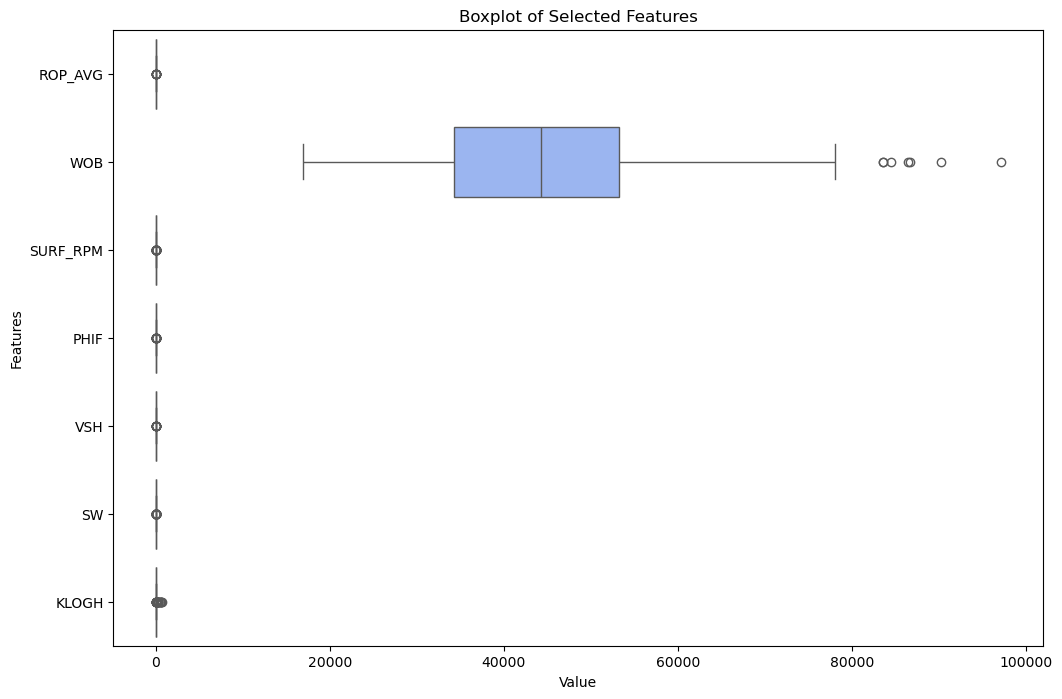

In [32]:

columns_for_boxplot = ['ROP_AVG', 'WOB', 'SURF_RPM', 'PHIF', 'VSH', 'SW', 'KLOGH']

# boxplots for each column
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[columns_for_boxplot], orient="h", palette="coolwarm")
plt.title("Boxplot of Selected Features")
plt.xlabel("Value")
plt.ylabel("Features")
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

url = "https://raw.githubusercontent.com/amolsriv/Oil-and-Gas-Projects/main/ROP%20data%20.csv"
df = pd.read_csv(url)

if df.empty:
    raise ValueError("The dataset is empty. Please check the URL or file content.")

# Separate feature and target
X = df.drop(['ROP_AVG'], axis=1)  # Features (all columns except 'ROP_AVG')
y = df['ROP_AVG']  # Target (ROP_AVG column)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Make pipeline
steps = [
    ('scaler', StandardScaler()),  # Scaling the features
    ('gbr', GradientBoostingRegressor(min_samples_leaf=6, max_depth=20, random_state=10))  # Model
]
pipe = Pipeline(steps)

# Fit pipeline to training data
pipe.fit(X_train, y_train)

# Evaluate model with R2 metric
train_score = pipe.score(X_train, y_train)  # R2 score on training data
test_score = pipe.score(X_test, y_test)  # R2 score on test data

# R2 scores
print(f'R2 on train set: {train_score:.2f}')
print(f'R2 on test set: {test_score:.2f}')

R2 on train set: 0.98
R2 on test set: 0.77


In [48]:
test_input = X_test.iloc[0].to_frame().T  # Convert to a dataframe with feature names
print("Test Input (Feature Values):")
print(test_input)

# Predict on the test input
predicted_value = pipe.predict(test_input)
print(f"Predicted ROP for Test Input: {predicted_value[0]:.2f}")

# Predict on new inputs
# A new input with arbitrary feature values as a dataframe with feature names
feature_names = X.columns  # Use the feature names from the original dataset
new_input_values = [[3750, 31209.191, 2.0003061, 0.0713992595, 0.455446648, 1.0, 0.001]]
new_input = pd.DataFrame(new_input_values, columns=feature_names)  # Create a dataframe
print("New Input (Feature Values):")
print(new_input)

# Predict on the new input
predicted_new_value = pipe.predict(new_input)
print(f"Predicted ROP for New Input: {predicted_new_value[0]:.2f}")

Test Input (Feature Values):
     Depth        WOB  SURF_RPM      PHIF       VSH   SW  KLOGH
85  3750.0  31209.191  2.000306  0.071399  0.455447  1.0  0.001
Predicted ROP for Test Input: 0.01
New Input (Feature Values):
   Depth        WOB  SURF_RPM      PHIF       VSH   SW  KLOGH
0   3750  31209.191  2.000306  0.071399  0.455447  1.0  0.001
Predicted ROP for New Input: 0.01


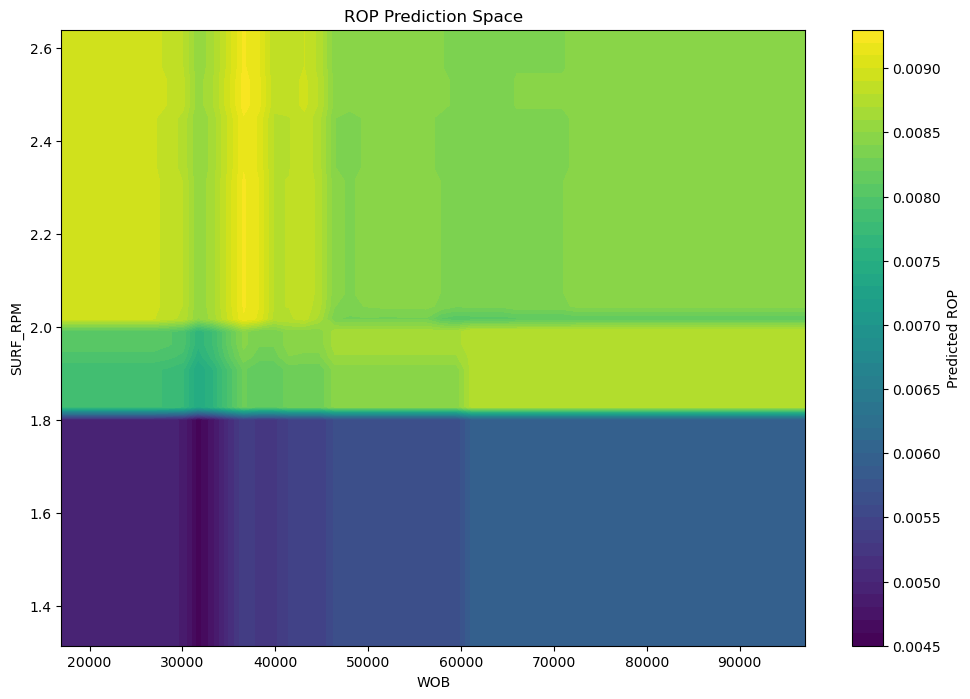

In [52]:
# Prediction space
rop_predictions = np.zeros_like(wob_grid)

for i in range(wob_grid.shape[0]):
    for j in range(wob_grid.shape[1]):
        input_data = constant_input.copy()
        input_data['WOB'] = wob_grid[i, j]
        input_data['SURF_RPM'] = rpm_grid[i, j]
        input_df = pd.DataFrame([input_data])
        
        # Extract the scalar prediction value using indexing
        rop_predictions[i, j] = pipe.predict(input_df)[0]

# Plot prediction space
plt.figure(figsize=(12, 8))
plt.contourf(wob_grid, rpm_grid, rop_predictions, levels=50, cmap='viridis')
plt.colorbar(label="Predicted ROP")
plt.xlabel("WOB")
plt.ylabel("SURF_RPM")
plt.title("ROP Prediction Space")
plt.show()